In [37]:
import json,requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import complete,leaves_list

In [38]:
REQUEST_PREFIX_A = 'https://api.semanticscholar.org/graph/v1/author/search?query='
REQUEST_SUFIX_A = '&fields=name,citationCount,papers,papers.citationCount'

'''
helper funcion to sort data by citations
'''
def citations(rec):
  return rec['citationCount']

'''
Build a function to get all the paper Id from a specific name
'''
def getPaperIdsFromAuthorName(name):
  paperIds = []

  papers = requests.get(REQUEST_PREFIX_A + name + REQUEST_SUFIX_A).json()
  for each in sorted(papers['data'], key=citations, reverse=True):
      for paperIdMap in each['papers']:
        paperIds.append(paperIdMap['paperId'])
  return paperIds

In [39]:
REQUEST_PREFIX_B = 'https://api.semanticscholar.org/graph/v1/paper/'
REQUEST_SUFIX_B = '?fields=title,embedding,citationCount,title'
def getVectorByPaperId(paperId):
  paperMap = requests.get(REQUEST_PREFIX_B + paperId + REQUEST_SUFIX_B).json()
  if paperMap['embedding'] == None:
    return None
  return paperMap['embedding']["vector"]

In [46]:
def buildMatriX(paperIds):
  matrix = []
  for paperId in paperIds:
    embeddingVector = getVectorByPaperId(paperId)
    if embeddingVector:
      matrix.append(embeddingVector)
  newMatrix = leaves_list(complete(pdist(matrix, metric='cosine')))
  leaves = np.array(newMatrix)
  r = np.array(matrix)
  leaves.shape
  r.shape
  return r,leaves

In [43]:
def visualizationWithLeaves(r,leaves):
  np.round(cosine_similarity(r[leaves,:]),2)
  plt.imshow(cosine_similarity(r[leaves,:]))
  plt.colorbar()

In [44]:
def visualizationWithoutLeaves(matrix):
  plt.imshow(cosine_similarity(matrix))
  plt.colorbar()

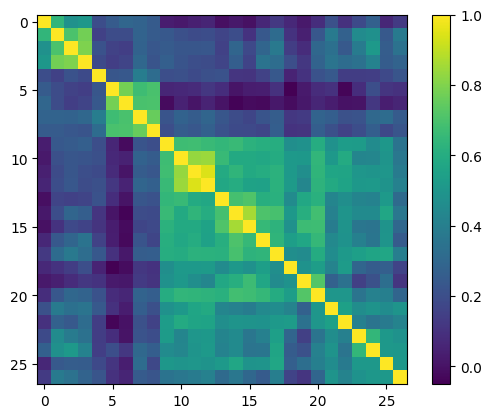

In [60]:
'''
run the program
'''
def runBetterTogether(name):
  paperIdsA = getPaperIdsFromAuthorName(name)
  rA,leavesA = buildMatriX(paperIdsA)
  visualizationWithLeaves(rA,leavesA)

#We take "Jiaji Luo" as an example
runBetterTogether('Jiaji Huang')

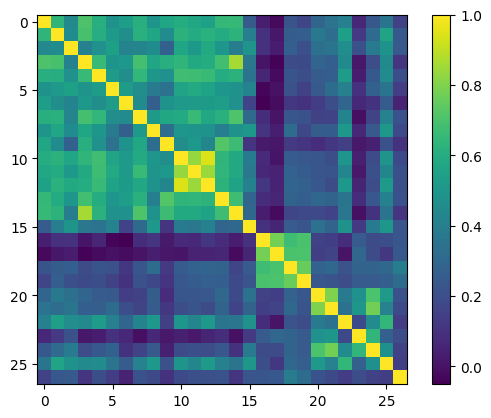

In [62]:
'''
run the program with anther style
'''
def runBetterTogether_B(name):
  paperIdsB = getPaperIdsFromAuthorName(name)
  rB,leavesB = buildMatriX(paperIdsB)
  visualizationWithoutLeaves(rB)

runBetterTogether_B('Jiaji Huang')

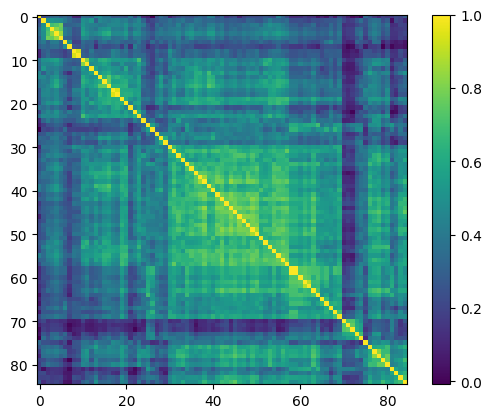

In [61]:
runBetterTogether('David Madigan')